# DeTECLoad

## 1. INITIATION

### 1.1 API

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow.keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import TimeDistributed, LSTM, Dense, Activation, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

### 1.2 Font

In [2]:
LabelFont = {'family' : 'Times New Roman',
             'weight' : 'normal',
             'size'   : 25}

UnitFont = {'family' : 'Times New Roman',
            'weight' : 'normal',
            'size'   : 20}

### 1.3 Supporting File

In [3]:
%run "4.Classifier_CNN-LSTM.ipynb"

## 2. LOAD DATA

In [4]:
DIR_Subject = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15']
DIR_GL = '../2. Result/1. Feature/1. GL/'
DIR_GR = '../2. Result/1. Feature/2. GR/'
DIR_W = '../2. Result/1. Feature/3. W/'

### 2.1 Accleration

In [5]:
Feature_Set_Acc_L = []
Label_Weight_Set_Acc_L = []
Label_Posture_Set_Acc_L = []

for i in range(0,len(DIR_Subject)):
    
    Feature = pd.read_csv(DIR_GL + DIR_Subject[i] + '_Acc_L_Feature.csv')
    Label_Weight = pd.read_csv(DIR_GL + DIR_Subject[i] + '_Acc_L_Label_Weight.csv')
    Label_Posture = pd.read_csv(DIR_GL + DIR_Subject[i] + '_Acc_L_Label_Posture.csv')

    Feature_Set_Acc_L.append(Feature)
    Label_Weight_Set_Acc_L.append(Label_Weight)
    Label_Posture_Set_Acc_L.append(Label_Posture)
        
    del Feature
    del Label_Weight
    del Label_Posture
    
    
Feature_Set_Acc_R = []
Label_Weight_Set_Acc_R = []
Label_Posture_Set_Acc_R = []

for i in range(0,len(DIR_Subject)):
    
    Feature = pd.read_csv(DIR_GR + DIR_Subject[i] + '_Acc_R_Feature.csv')
    Label_Weight = pd.read_csv(DIR_GR + DIR_Subject[i] + '_Acc_R_Label_Weight.csv')
    Label_Posture = pd.read_csv(DIR_GR + DIR_Subject[i] + '_Acc_R_Label_Posture.csv')

    Feature_Set_Acc_R.append(Feature)
    Label_Weight_Set_Acc_R.append(Label_Weight)
    Label_Posture_Set_Acc_R.append(Label_Posture)
        
    del Feature
    del Label_Weight
    del Label_Posture
    
    
Feature_Set_Acc_W = []
Label_Weight_Set_Acc_W = []
Label_Posture_Set_Acc_W = []

for i in range(0,len(DIR_Subject)):
    
    Feature = pd.read_csv(DIR_W + DIR_Subject[i] + '_Acc_W_Feature.csv')
    Label_Weight = pd.read_csv(DIR_W + DIR_Subject[i] + '_Acc_W_Label_Weight.csv')
    Label_Posture = pd.read_csv(DIR_W + DIR_Subject[i] + '_Acc_W_Label_Posture.csv')

    Feature_Set_Acc_W.append(Feature)
    Label_Weight_Set_Acc_W.append(Label_Weight)
    Label_Posture_Set_Acc_W.append(Label_Posture)
        
    del Feature
    del Label_Weight
    del Label_Posture

In [6]:
Feature_Set_Acc_L = np.vstack(Feature_Set_Acc_L)
Label_Weight_Set_Acc_L = np.vstack(Label_Weight_Set_Acc_L)
Label_Posture_Set_Acc_L = np.vstack(Label_Posture_Set_Acc_L)

Feature_Set_Acc_L = np.array(Feature_Set_Acc_L)
Label_Weight_Set_Acc_L = np.array(Label_Weight_Set_Acc_L)
Label_Posture_Set_Acc_L = np.array(Label_Posture_Set_Acc_L)

Feature_Set_Acc_L = Feature_Set_Acc_L.reshape(len(Label_Weight_Set_Acc_L),6,3,30,30)


Feature_Set_Acc_R = np.vstack(Feature_Set_Acc_R)
Label_Weight_Set_Acc_R = np.vstack(Label_Weight_Set_Acc_R)
Label_Posture_Set_Acc_R = np.vstack(Label_Posture_Set_Acc_R)

Feature_Set_Acc_R = np.array(Feature_Set_Acc_R)
Label_Weight_Set_Acc_R = np.array(Label_Weight_Set_Acc_R)
Label_Posture_Set_Acc_R = np.array(Label_Posture_Set_Acc_R)

Feature_Set_Acc_R = Feature_Set_Acc_R.reshape(len(Label_Weight_Set_Acc_R),6,3,30,30)


Feature_Set_Acc_W = np.vstack(Feature_Set_Acc_W)
Label_Weight_Set_Acc_W = np.vstack(Label_Weight_Set_Acc_W)
Label_Posture_Set_Acc_W = np.vstack(Label_Posture_Set_Acc_W)

Feature_Set_Acc_W = np.array(Feature_Set_Acc_W)
Label_Weight_Set_Acc_W = np.array(Label_Weight_Set_Acc_W)
Label_Posture_Set_Acc_W = np.array(Label_Posture_Set_Acc_W)

Feature_Set_Acc_W = Feature_Set_Acc_W.reshape(len(Label_Weight_Set_Acc_W),6,3,30,30)

In [7]:
Data_Train_Acc_L, Data_Test_Acc_L, Label_Weight_Train_Acc_L, Label_Weight_Test_Acc_L, Label_Posture_Train_Acc_L, Label_Posture_Test_Acc_L = train_test_split(Feature_Set_Acc_L, Label_Weight_Set_Acc_L, Label_Posture_Set_Acc_L, test_size = 0.3, random_state=7, shuffle=True)
Data_Train_Acc_L, Data_Val_Acc_L, Label_Weight_Train_Acc_L, Label_Weight_Val_Acc_L, Label_Posture_Train_Acc_L, Label_Posture_Val_Acc_L = train_test_split(Data_Train_Acc_L, Label_Weight_Train_Acc_L, Label_Posture_Train_Acc_L, test_size = 0.1, random_state=7, shuffle=True)

Data_Train_Acc_L = np.array(Data_Train_Acc_L)
Data_Val_Acc_L = np.array(Data_Val_Acc_L)
Data_Test_Acc_L = np.array(Data_Test_Acc_L)


Data_Train_Acc_R, Data_Test_Acc_R, Label_Weight_Train_Acc_R, Label_Weight_Test_Acc_R, Label_Posture_Train_Acc_R, Label_Posture_Test_Acc_R = train_test_split(Feature_Set_Acc_R, Label_Weight_Set_Acc_R, Label_Posture_Set_Acc_R, test_size = 0.3, random_state=7, shuffle=True)
Data_Train_Acc_R, Data_Val_Acc_R, Label_Weight_Train_Acc_R, Label_Weight_Val_Acc_R, Label_Posture_Train_Acc_R, Label_Posture_Val_Acc_R = train_test_split(Data_Train_Acc_R, Label_Weight_Train_Acc_R, Label_Posture_Train_Acc_R, test_size = 0.1, random_state=7, shuffle=True)

Data_Train_Acc_R = np.array(Data_Train_Acc_R)
Data_Val_Acc_R = np.array(Data_Val_Acc_R)
Data_Test_Acc_R = np.array(Data_Test_Acc_R)


Data_Train_Acc_W, Data_Test_Acc_W, Label_Weight_Train_Acc_W, Label_Weight_Test_Acc_W, Label_Posture_Train_Acc_W, Label_Posture_Test_Acc_W = train_test_split(Feature_Set_Acc_W, Label_Weight_Set_Acc_W, Label_Posture_Set_Acc_W, test_size = 0.3, random_state=7, shuffle=True)
Data_Train_Acc_W, Data_Val_Acc_W, Label_Weight_Train_Acc_W, Label_Weight_Val_Acc_W, Label_Posture_Train_Acc_W, Label_Posture_Val_Acc_W = train_test_split(Data_Train_Acc_W, Label_Weight_Train_Acc_W, Label_Posture_Train_Acc_W, test_size = 0.1, random_state=7, shuffle=True)

Data_Train_Acc_W = np.array(Data_Train_Acc_W)
Data_Val_Acc_W = np.array(Data_Val_Acc_W)
Data_Test_Acc_W = np.array(Data_Test_Acc_W)

In [8]:
print(Data_Train_Acc_L.shape)
print(Data_Val_Acc_L.shape)
print(Data_Test_Acc_L.shape)
print(Label_Weight_Train_Acc_L.shape)
print(Label_Posture_Train_Acc_L.shape)

print(Data_Train_Acc_R.shape)
print(Data_Val_Acc_R.shape)
print(Data_Test_Acc_R.shape)
print(Label_Weight_Train_Acc_R.shape)
print(Label_Posture_Train_Acc_R.shape)

print(Data_Train_Acc_W.shape)
print(Data_Val_Acc_W.shape)
print(Data_Test_Acc_W.shape)
print(Label_Weight_Train_Acc_W.shape)
print(Label_Posture_Train_Acc_W.shape)

(2116, 6, 3, 30, 30)
(236, 6, 3, 30, 30)
(1008, 6, 3, 30, 30)
(2116, 3)
(2116, 2)
(2116, 6, 3, 30, 30)
(236, 6, 3, 30, 30)
(1008, 6, 3, 30, 30)
(2116, 3)
(2116, 2)
(2116, 6, 3, 30, 30)
(236, 6, 3, 30, 30)
(1008, 6, 3, 30, 30)
(2116, 3)
(2116, 2)


### 2.2 Angular Velocity

In [9]:
Feature_Set_Ang_L = []
Label_Weight_Set_Ang_L = []
Label_Posture_Set_Ang_L = []

for i in range(0,len(DIR_Subject)):
    
    Feature = pd.read_csv(DIR_GL + DIR_Subject[i] + '_Ang_L_Feature.csv')
    Label_Weight = pd.read_csv(DIR_GL + DIR_Subject[i] + '_Ang_L_Label_Weight.csv')
    Label_Posture = pd.read_csv(DIR_GL + DIR_Subject[i] + '_Ang_L_Label_Posture.csv')

    Feature_Set_Ang_L.append(Feature)
    Label_Weight_Set_Ang_L.append(Label_Weight)
    Label_Posture_Set_Ang_L.append(Label_Posture)
        
    del Feature
    del Label_Weight
    del Label_Posture
    
    
Feature_Set_Ang_R = []
Label_Weight_Set_Ang_R = []
Label_Posture_Set_Ang_R = []

for i in range(0,len(DIR_Subject)):
    
    Feature = pd.read_csv(DIR_GR + DIR_Subject[i] + '_Ang_R_Feature.csv')
    Label_Weight = pd.read_csv(DIR_GR + DIR_Subject[i] + '_Ang_R_Label_Weight.csv')
    Label_Posture = pd.read_csv(DIR_GR + DIR_Subject[i] + '_Ang_R_Label_Posture.csv')

    Feature_Set_Ang_R.append(Feature)
    Label_Weight_Set_Ang_R.append(Label_Weight)
    Label_Posture_Set_Ang_R.append(Label_Posture)
        
    del Feature
    del Label_Weight
    del Label_Posture


Feature_Set_Ang_W = []
Label_Weight_Set_Ang_W = []
Label_Posture_Set_Ang_W = []

for i in range(0,len(DIR_Subject)):
    
    Feature = pd.read_csv(DIR_W + DIR_Subject[i] + '_Ang_W_Feature.csv')
    Label_Weight = pd.read_csv(DIR_W + DIR_Subject[i] + '_Ang_W_Label_Weight.csv')
    Label_Posture = pd.read_csv(DIR_W + DIR_Subject[i] + '_Ang_W_Label_Posture.csv')

    Feature_Set_Ang_W.append(Feature)
    Label_Weight_Set_Ang_W.append(Label_Weight)
    Label_Posture_Set_Ang_W.append(Label_Posture)
        
    del Feature
    del Label_Weight
    del Label_Posture

In [10]:
Feature_Set_Ang_L = np.vstack(Feature_Set_Ang_L)
Label_Weight_Set_Ang_L = np.vstack(Label_Weight_Set_Ang_L)
Label_Posture_Set_Ang_L = np.vstack(Label_Posture_Set_Ang_L)

Feature_Set_Ang_L = np.array(Feature_Set_Ang_L)
Label_Weight_Set_Ang_L = np.array(Label_Weight_Set_Ang_L)
Label_Posture_Set_Ang_L = np.array(Label_Posture_Set_Ang_L)

Feature_Set_Ang_L = Feature_Set_Ang_L.reshape(len(Label_Weight_Set_Ang_L),6,3,30,30)


Feature_Set_Ang_R = np.vstack(Feature_Set_Ang_R)
Label_Weight_Set_Ang_R = np.vstack(Label_Weight_Set_Ang_R)
Label_Posture_Set_Ang_R = np.vstack(Label_Posture_Set_Ang_R)

Feature_Set_Ang_R = np.array(Feature_Set_Ang_R)
Label_Weight_Set_Ang_R = np.array(Label_Weight_Set_Ang_R)
Label_Posture_Set_Ang_R = np.array(Label_Posture_Set_Ang_R)

Feature_Set_Ang_R = Feature_Set_Ang_R.reshape(len(Label_Weight_Set_Ang_R),6,3,30,30)


Feature_Set_Ang_W = np.vstack(Feature_Set_Ang_W)
Label_Weight_Set_Ang_W = np.vstack(Label_Weight_Set_Ang_W)
Label_Posture_Set_Ang_W = np.vstack(Label_Posture_Set_Ang_W)

Feature_Set_Ang_W = np.array(Feature_Set_Ang_W)
Label_Weight_Set_Ang_W = np.array(Label_Weight_Set_Ang_W)
Label_Posture_Set_Ang_W = np.array(Label_Posture_Set_Ang_W)

Feature_Set_Ang_W = Feature_Set_Ang_W.reshape(len(Label_Weight_Set_Ang_W),6,3,30,30)

In [11]:
Data_Train_Ang_L, Data_Test_Ang_L, Label_Weight_Train_Ang_L, Label_Weight_Test_Ang_L, Label_Posture_Train_Ang_L, Label_Posture_Test_Ang_L = train_test_split(Feature_Set_Ang_L, Label_Weight_Set_Ang_L, Label_Posture_Set_Ang_L, test_size = 0.3, random_state=7, shuffle=True)
Data_Train_Ang_L, Data_Val_Ang_L, Label_Weight_Train_Ang_L, Label_Weight_Val_Ang_L, Label_Posture_Train_Ang_L, Label_Posture_Val_Ang_L = train_test_split(Data_Train_Ang_L, Label_Weight_Train_Ang_L, Label_Posture_Train_Ang_L, test_size = 0.1, random_state=7, shuffle=True)

Data_Train_Ang_L = np.array(Data_Train_Ang_L)
Data_Val_Ang_L = np.array(Data_Val_Ang_L)
Data_Test_Ang_L = np.array(Data_Test_Ang_L)


Data_Train_Ang_R, Data_Test_Ang_R, Label_Weight_Train_Ang_R, Label_Weight_Test_Ang_R, Label_Posture_Train_Ang_R, Label_Posture_Test_Ang_R = train_test_split(Feature_Set_Ang_R, Label_Weight_Set_Ang_R, Label_Posture_Set_Ang_R, test_size = 0.3, random_state=7, shuffle=True)
Data_Train_Ang_R, Data_Val_Ang_R, Label_Weight_Train_Ang_R, Label_Weight_Val_Ang_R, Label_Posture_Train_Ang_R, Label_Posture_Val_Ang_R = train_test_split(Data_Train_Ang_R, Label_Weight_Train_Ang_R, Label_Posture_Train_Ang_R, test_size = 0.1, random_state=7, shuffle=True)

Data_Train_Ang_R = np.array(Data_Train_Ang_R)
Data_Val_Ang_R = np.array(Data_Val_Ang_R)
Data_Test_Ang_R = np.array(Data_Test_Ang_R)


Data_Train_Ang_W, Data_Test_Ang_W, Label_Weight_Train_Ang_W, Label_Weight_Test_Ang_W, Label_Posture_Train_Ang_W, Label_Posture_Test_Ang_W = train_test_split(Feature_Set_Ang_W, Label_Weight_Set_Ang_W, Label_Posture_Set_Ang_W, test_size = 0.3, random_state=7, shuffle=True)
Data_Train_Ang_W, Data_Val_Ang_W, Label_Weight_Train_Ang_W, Label_Weight_Val_Ang_W, Label_Posture_Train_Ang_W, Label_Posture_Val_Ang_W = train_test_split(Data_Train_Ang_W, Label_Weight_Train_Ang_W, Label_Posture_Train_Ang_W, test_size = 0.1, random_state=7, shuffle=True)

Data_Train_Ang_W = np.array(Data_Train_Ang_W)
Data_Val_Ang_W = np.array(Data_Val_Ang_W)
Data_Test_Ang_W = np.array(Data_Test_Ang_W)

In [12]:
print(Data_Train_Ang_L.shape)
print(Data_Val_Ang_L.shape)
print(Data_Test_Ang_L.shape)
print(Label_Weight_Train_Ang_L.shape)
print(Label_Posture_Train_Ang_L.shape)

print(Data_Train_Ang_R.shape)
print(Data_Val_Ang_R.shape)
print(Data_Test_Ang_R.shape)
print(Label_Weight_Train_Ang_R.shape)
print(Label_Posture_Train_Ang_R.shape)

print(Data_Train_Ang_W.shape)
print(Data_Val_Ang_W.shape)
print(Data_Test_Ang_W.shape)
print(Label_Weight_Train_Ang_W.shape)
print(Label_Posture_Train_Ang_W.shape)

(2116, 6, 3, 30, 30)
(236, 6, 3, 30, 30)
(1008, 6, 3, 30, 30)
(2116, 3)
(2116, 2)
(2116, 6, 3, 30, 30)
(236, 6, 3, 30, 30)
(1008, 6, 3, 30, 30)
(2116, 3)
(2116, 2)
(2116, 6, 3, 30, 30)
(236, 6, 3, 30, 30)
(1008, 6, 3, 30, 30)
(2116, 3)
(2116, 2)


## 3. SELECTION

In [13]:
Name = 'R'

## 4. TRAIN

### 4.1 Training

In [ ]:
# Variable #
W = len(Feature_Set_Acc_R[0])
X = len(Feature_Set_Acc_R[0][0])
Y = len(Feature_Set_Acc_R[0][0][0])
Z = len(Feature_Set_Acc_R[0][0][0])


# History #
Wei = ModelCheckpoint(Name + '_Weight.hdf5', monitor='val_Model_Weight_acc', verbose=1, save_best_only=True, mode='max')
Pos = ModelCheckpoint(Name + '_Posture.hdf5', monitor='val_Model_Posture_acc', verbose=1, save_best_only=True, mode='max')
His = CSVLogger(Name + '_History.csv', append=True, separator=';')


# Train #
Model_Final = Model_GR(3, 2) # Weigth, Posture
History = Model_Final.fit([Data_Train_Acc_R, Data_Train_Ang_R], [Label_Weight_Train_Acc_R, Label_Posture_Train_Acc_R], validation_data=([Data_Val_Acc_R, Data_Val_Ang_R], [Label_Weight_Val_Acc_R, Label_Posture_Val_Acc_R]), batch_size=10, epochs=500, callbacks=[Wei, Pos, His], verbose=1)

plot_model(Model_Final, to_file=Name +'_Model.png', show_shapes=True, show_layer_names=True)

### 4.2 History

In [ ]:
## ACCURACY ##
plt.figure(figsize=(6,4))
plt.title('Model Weight Accuracy', **LabelFont)
plt.ylabel('Accuracy', **LabelFont)
plt.xlabel('Epoch', **LabelFont)
plt.xlim(0,500)
plt.ylim(0,1)
plt.xticks(np.linspace(0,500,6), **UnitFont)
plt.yticks(np.linspace(0,1,6), **UnitFont)
plt.plot(History.history['Model_Weight_acc'], 'black')
plt.plot(History.history['val_Model_Weight_acc'], 'gray')
plt.legend(['Train', 'Val', 'Test'], loc='lower right', prop={'family' : 'Times New Roman', 'size': 15})
plt.savefig(Name + '_Weight_Acc.png', bbox_inches='tight', dpi=300, transparent = True)
plt.show()

plt.figure(figsize=(6,4))
plt.title('Model Posture Accuracy', **LabelFont)
plt.ylabel('Accuracy', **LabelFont)
plt.xlabel('Epoch', **LabelFont)
plt.xlim(0,500)
plt.ylim(0,1)
plt.xticks(np.linspace(0,500,6), **UnitFont)
plt.yticks(np.linspace(0,1,6), **UnitFont)
plt.plot(History.history['Model_Posture_acc'], 'black')
plt.plot(History.history['val_Model_Posture_acc'], 'gray')
plt.legend(['Train', 'Val', 'Test'], loc='lower right', prop={'family' : 'Times New Roman', 'size': 15})
plt.savefig(Name + '_Posture_Acc.png', bbox_inches='tight', dpi=300, transparent = True)
plt.show()


## LOSS ##
plt.figure(figsize=(6,4))
plt.title('Model Weight Loss',**LabelFont)
plt.ylabel('Loss', **LabelFont)
plt.xlabel('Epoch', **LabelFont)
plt.xlim(0,500)
plt.ylim(0,15)
plt.xticks(np.linspace(0,500,6), **UnitFont)
plt.yticks(np.linspace(0,15,6), **UnitFont)
plt.plot(History.history['Model_Weight_loss'], 'black')
plt.plot(History.history['val_Model_Weight_loss'], 'gray')
plt.legend(['Train', 'Val', 'Test'], loc='upper right', prop={'family' : 'Times New Roman', 'size': 15})
plt.savefig(Name + '_Weight_Loss.png', bbox_inches='tight', dpi=300, transparent = True)
plt.show()

plt.figure(figsize=(6,4))
plt.title('Model Posture Loss',**LabelFont)
plt.ylabel('Loss', **LabelFont)
plt.xlabel('Epoch', **LabelFont)
plt.xlim(0,500)
plt.ylim(0,15)
plt.xticks(np.linspace(0,500,6), **UnitFont)
plt.yticks(np.linspace(0,15,6), **UnitFont)
plt.plot(History.history['Model_Posture_loss'], 'black')
plt.plot(History.history['val_Model_Posture_loss'], 'gray')
plt.legend(['Train', 'Val', 'Test'], loc='upper right', prop={'family' : 'Times New Roman', 'size': 15})
plt.savefig(Name + '_Posture_Loss.png', bbox_inches='tight', dpi=300, transparent = True)
plt.show()

## 5. TEST

1008/1008 [==============================] - 4s 4ms/sample - loss: 0.5894 - Model_Weight_loss: 0.4303 - Model_Position_loss: 0.1662 - Model_Weight_accuracy: 0.9077 - Model_Position_accuracy: 0.9633


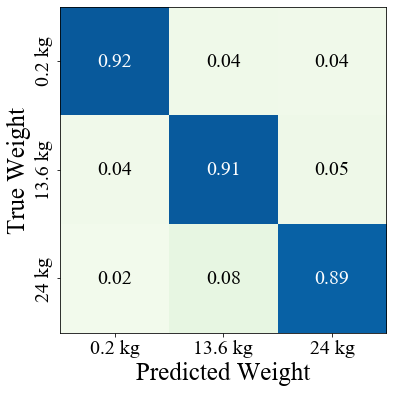

1008/1008 [==============================] - 2s 2ms/sample - loss: 0.6642 - Model_Weight_loss: 0.4849 - Model_Position_loss: 0.1740 - Model_Weight_accuracy: 0.8700 - Model_Position_accuracy: 0.9534


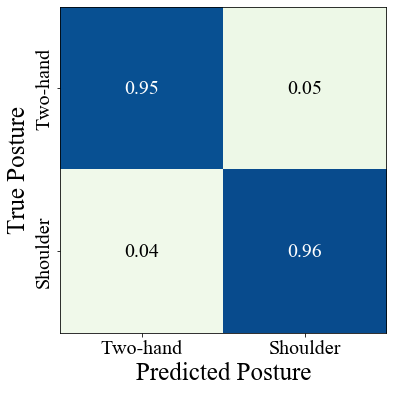

Weight_W_ 90.77380895614624
Posture_W_ 96.32936716079712
Weight_P_ 87.0039701461792
Posture_P_ 95.33730149269104


In [14]:
## Single IMU ##
DIR_Weight = '../2. Result/2. Performance/2. R/'

Data_Test_Acc = Data_Test_Acc_R
Data_Test_Ang = Data_Test_Ang_R
Label_Weight_Test_Acc = Label_Weight_Test_Acc_R
Label_Posture_Test_Acc = Label_Posture_Test_Acc_R

Model_Test(DIR_Weight + Name + '_Weight.hdf5', DIR_Weight + Name + '_Posture.hdf5')